# Table of contents

01. Importing libraries and data
02. Bar charts of orders by day of week
03. Histogram of prices
04. Line chart comparing price and day of week of purchase

- Creating a subset of the data for sampling
- Creating line chart

# 01. Importing libraries and data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing pkl file

ords_prods_flagged = pd.read_pickle(r'/Users/zoey/Career Foundry Stuff/Instacart Basket Analysis - 14.12.2023/02 Data/Prepared Data/ords_prods_merged_flagged.pkl')

# 02. Bar charts of orders by day of week

<Axes: xlabel='orders_day_of_week'>

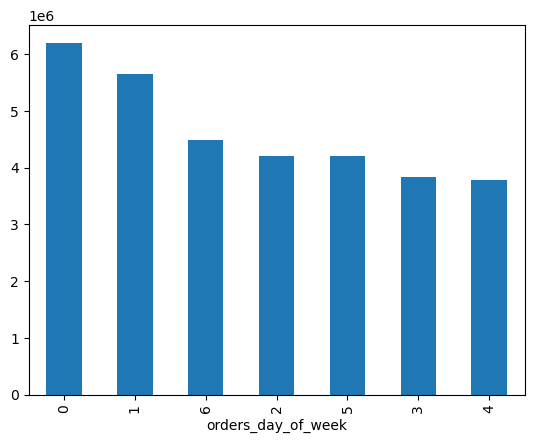

In [3]:
# Creating bar chart visualization

ords_prods_flagged['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

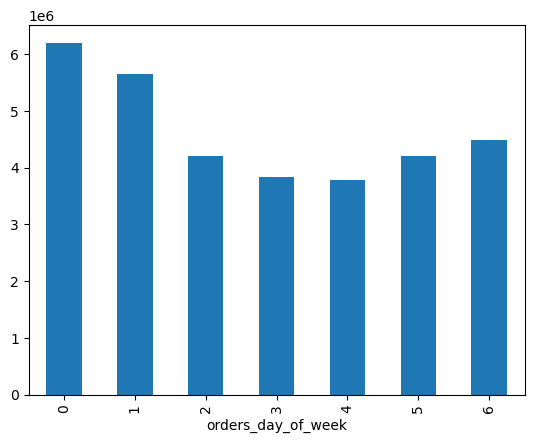

In [4]:
# Creating bar chart visualization with days in order

ords_prods_flagged['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_week'>

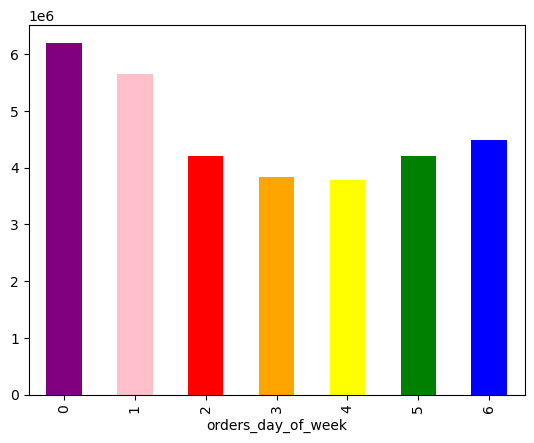

In [5]:
# Adding color to the bar chart visualization with days in order

ords_prods_flagged['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'pink', 'red', 'orange', 'yellow', 'green', 'blue'])

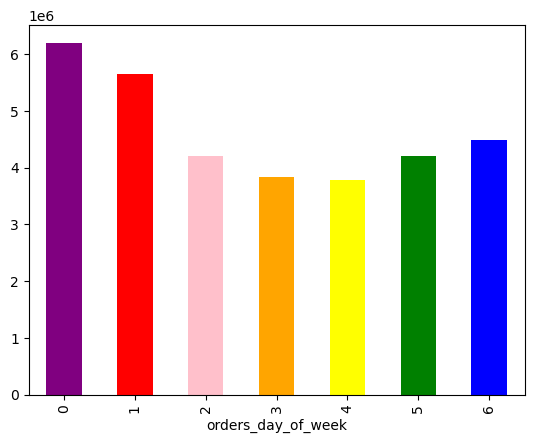

In [6]:
# Saving chart in Jupyter history

bar = ords_prods_flagged['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

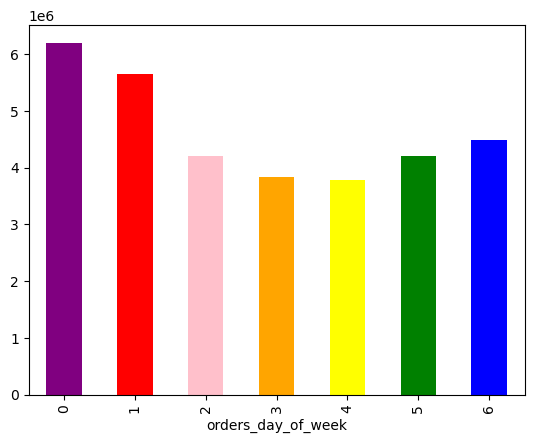

In [7]:
bar.figure

In [8]:
# Saving bar chart

bar.figure.savefig(r'/Users/zoey/Career Foundry Stuff/Instacart Basket Analysis - 14.12.2023/04 Analysis/Visualizations, bar_orders_dow.png')

# 03. Histogram of prices

<Axes: ylabel='Frequency'>

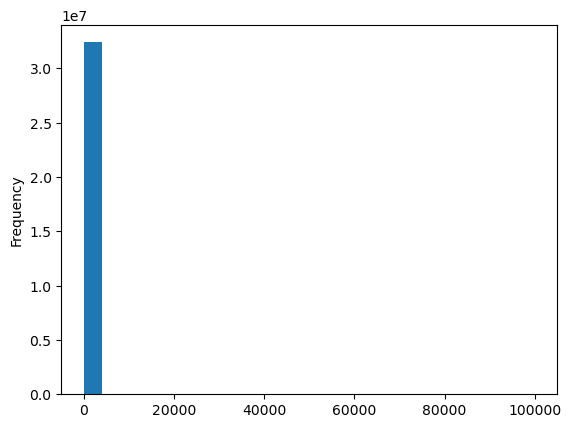

In [9]:
# Creating histograms of the prices

ords_prods_flagged['prices'].plot.hist(bins=25)

<Axes: xlabel='prices', ylabel='prices'>

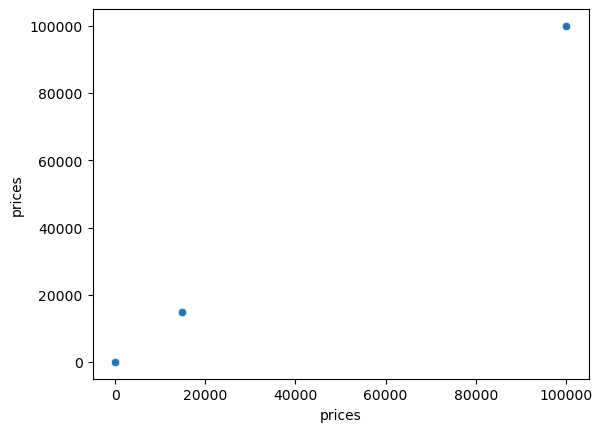

In [10]:
# Creating a scatterplot to find outliers

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_flagged)

In [11]:
# Exploring the data for outliers

ords_prods_flagged.loc[ords_prods_flagged['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,av_price_order,spending_flag,order_regularity,order_frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [12]:
# Looking at the price data

ords_prods_flagged['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
# Looking for the max price value specifically

ords_prods_flagged['prices'].max()

99999.0

In [14]:
# Marking prices over 100 as NaN since they seem illogical

ords_prods_flagged.loc[ords_prods_flagged['prices'] >100, 'prices'] = np.nan

In [15]:
# Checking that the replacement was successful

ords_prods_flagged['prices'].max()

25.0

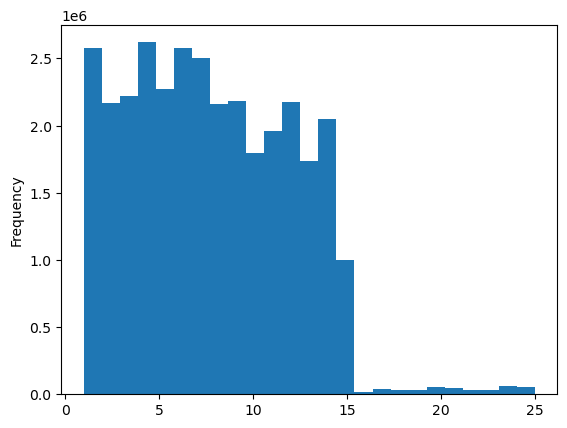

In [16]:
# Creating a new histogram now that the outliers have been removed

hist = ords_prods_flagged['prices'].plot.hist(bins=25)

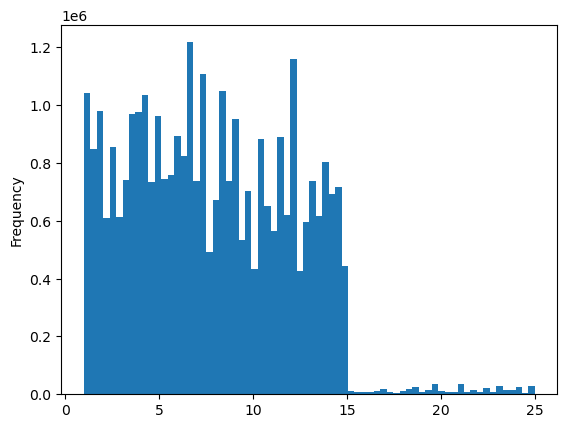

In [17]:
# Creating a more granular histogram

hist_2 = ords_prods_flagged['prices'].plot.hist(bins=70)

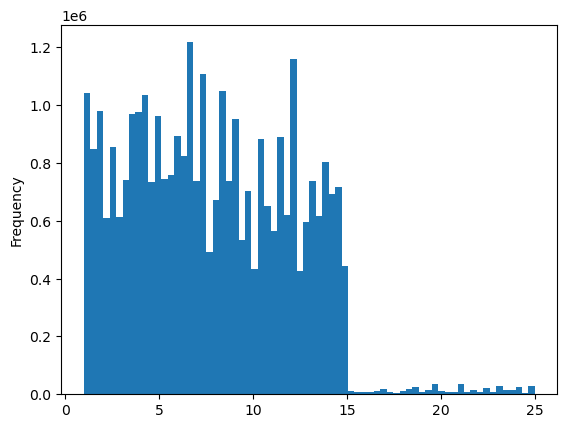

In [18]:
# Saving histogram in Jupyter history

hist = ords_prods_flagged['prices'].plot.hist(bins=70)

In [19]:
# Saving hisogram

hist.figure.savefig(r'/Users/zoey/Career Foundry Stuff/Instacart Basket Analysis - 14.12.2023/04 Analysis/Visualizations, hist_product_prices.png')

# 04. Line chart comparing price and day of week of purchase

- Creating a subset of the data for sampling
- Creating line chart

In [20]:
# Assigning values to the rows for sampling
# Creating two lists holding True/False values depending on whether its larger than 0.7 or not

np.random.seed(4)
dev = np.random.rand(len(ords_prods_flagged)) <= 0.7

In [21]:
# Looking at the output of the above

dev

array([False,  True, False, ...,  True,  True,  True])

In [22]:
# Splitting dataframe into two samples, storing 70% of the sample in the dataframe big

big = ords_prods_flagged[dev]

In [23]:
# Splitting dataframe into two samples, storing 30% of the sample in the dataframe small

small = ords_prods_flagged[~dev]

In [24]:
# Checking to make sure the split was correct
# Looking at the length of the entire dataset

len(ords_prods_flagged)

32404859

In [25]:
# Looking at the length of the two split datasets added together

len(big) + len(small)

32404859

In [26]:
# Reducing the dataset to only include the columns needed for the linechart to compare price and day of the week the order was made

df_2 = small[['orders_day_of_week','prices']]

In [27]:
# Checking the above reduction

df_2.head()

,orders_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8


/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


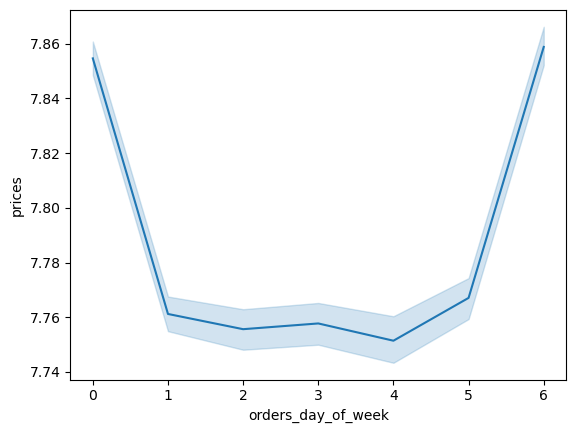

In [28]:
# Creating a lineplot to compare prices and day of week the order was made

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [29]:
# Saving line chart

line.figure.savefig(r'/Users/zoey/Career Foundry Stuff/Instacart Basket Analysis - 14.12.2023/04 Analysis/Visualizations, lineplot_orders_day_of_week_prices.png')